# Degree assortativity of a network

In [1]:
import networkx as nx
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
filepath='./../network_data/ca-AstroPh.txt'

In [4]:
G=nx.Graph()

In [5]:
fh=open(filepath,'r')
for line in fh.readlines():
    s=line.strip().split()
    if s[0]!='#':
        origin=int(s[0])
        dest=int(s[1])
        G.add_edge(origin,dest)
fh.close()

## measurement of assortativity

Assortativity can be measured in different ways. A simple approach is measuring the average nearest neighbor degree to assess the level of degree-assortativity.

In [39]:
from collections import defaultdict

In [40]:
x=[]
y=[]

avg_knn=defaultdict(list)

for n in G.nodes():
    
    k=G.degree(n)
    
    #nn=len(G.neighbors(n))
    total=0
    for j in G.neighbors(n):
        total+=G.degree(j)
    
    avg_knn[k].append(float(total)/k)
    
    x.append(k)
    y.append(float(total)/k)

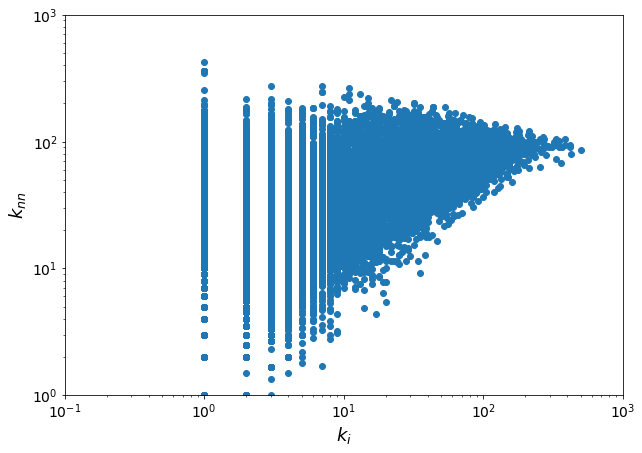

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)

plt.xlabel('$k_i$', fontsize=18)
plt.ylabel('$k_{nn}$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.axis([0.1,1000,1,1000])
plt.show()

In [42]:
z=[]
for k in sorted(avg_knn.keys()):
    knn=np.array(avg_knn[k])
    z.append(np.average(knn))

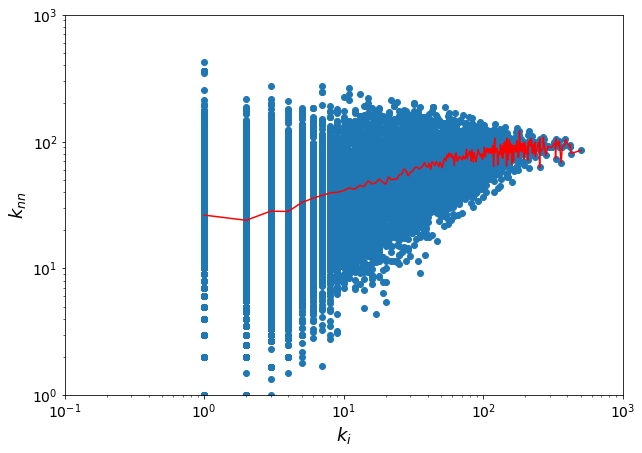

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.plot(sorted(avg_knn.keys()), z,'-r')

plt.xlabel('$k_i$', fontsize=18)
plt.ylabel('$k_{nn}$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.axis([0.1,1000,1,1000])
plt.show()

In [44]:
r=nx.degree_assortativity_coefficient(G)

In [45]:
print(r)

0.20512067898648875


The degree assortativity coefficient of a ER graph is zero. The ER graph has no correlations.

In [46]:
ERr=nx.degree_assortativity_coefficient(ER)

In [47]:
ERr

-0.0022017300364285384

NetworkX offers a number of functions to compute the same quantity.

In [48]:
knn_avg2=nx.average_degree_connectivity(G)

In [49]:
print(knn_avg2)

{75: 77.99882352941177, 31: 58.04037897586284, 43: 69.43556771545828, 2: 23.927865037812683, 90: 77.11203703703704, 42: 60.331389698736636, 118: 78.43502824858757, 30: 57.107625272331155, 113: 80.56814159292036, 3: 28.27523510971787, 28: 58.709793351302785, 8: 39.26327433628319, 158: 86.37341772151899, 13: 44.994888023369036, 77: 73.6357733175915, 36: 62.516007532956685, 257: 86.91439688715953, 12: 42.094705443698736, 134: 89.48258706467662, 55: 78.45880077369439, 171: 82.84210526315789, 86: 81.7296511627907, 15: 48.993356242840775, 274: 96.15328467153284, 47: 67.27006769825918, 91: 80.11648351648351, 22: 49.707849419303166, 150: 90.85555555555555, 14: 44.20594010800196, 6: 35.63912864775997, 52: 71.10063224446786, 67: 75.60914179104478, 108: 87.86516203703704, 27: 60.657407407407405, 142: 87.4906103286385, 62: 64.69180470793374, 7: 37.66788247213779, 61: 76.44262295081967, 49: 68.4408811143505, 132: 81.35950413223141, 41: 67.15829746532759, 5: 33.02613981762918, 32: 61.44760338345865,

In [50]:
knn_avg3=nx.k_nearest_neighbors(G)

In [51]:
print(knn_avg3)

{75: 77.99882352941177, 31: 58.04037897586284, 43: 69.43556771545828, 2: 23.927865037812683, 90: 77.11203703703704, 42: 60.331389698736636, 118: 78.43502824858757, 30: 57.107625272331155, 113: 80.56814159292036, 3: 28.27523510971787, 28: 58.709793351302785, 8: 39.26327433628319, 158: 86.37341772151899, 13: 44.994888023369036, 77: 73.6357733175915, 36: 62.516007532956685, 257: 86.91439688715953, 12: 42.094705443698736, 134: 89.48258706467662, 55: 78.45880077369439, 171: 82.84210526315789, 86: 81.7296511627907, 15: 48.993356242840775, 274: 96.15328467153284, 47: 67.27006769825918, 91: 80.11648351648351, 22: 49.707849419303166, 150: 90.85555555555555, 14: 44.20594010800196, 6: 35.63912864775997, 52: 71.10063224446786, 67: 75.60914179104478, 108: 87.86516203703704, 27: 60.657407407407405, 142: 87.4906103286385, 62: 64.69180470793374, 7: 37.66788247213779, 61: 76.44262295081967, 49: 68.4408811143505, 132: 81.35950413223141, 41: 67.15829746532759, 5: 33.02613981762918, 32: 61.44760338345865,

In [52]:
r2=nx.degree_pearson_correlation_coefficient(G)
print(r2)

0.20512067898648859


---
# Simulating random and targeted attacks to a network

Resilience is the ability to provide and maintain an acceptable level of service in the face of faults and challenges to normal operation. Threats and challenges for services can range from simple misconfiguration over large scale natural disasters to targeted attacks.

We define a function that performs a random or targeted attack to a network according to a given strategy (random, degree based, betweenness based, etc. )

In [53]:
def net_attack(graph, ranked_nodes):
    
    fraction_removed=[]#here we store the tuples: (%removed nodes, size of gcc)
    
    graph1=graph.copy()
    nnodes=len(ranked_nodes)
    n=0    
    
    gcc=list(nx.connected_components(graph1))[0]
    
    gcc_size=float(len(gcc))/nnodes
    
    fraction_removed.append( (float(n)/nnodes, gcc_size) )
    
    while gcc_size>0.01:
        
        #we start from the end of the list!
        graph1.remove_node(ranked_nodes.pop())

        gcc=list(nx.connected_components(graph1))[0]
        gcc_size=float(len(gcc))/nnodes
        n+=1
        fraction_removed.append( (float(n)/nnodes, gcc_size) )
    
    return fraction_removed

## Robustness of the US airport network
### Random attack

In [54]:
filepath_air='./../network_data/USairport_2010.txt'

In [55]:
G=nx.Graph()
fh=open(filepath_air,'r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()    

In [56]:
airport_nodes=list(G.nodes())

In [58]:
resilience_random=net_attack(G, airport_nodes)

### Betweenness based attack

In [59]:
from operator import itemgetter

In [60]:
airport_nodes_betw=[]

betw=nx.betweenness_centrality(G)
for i in sorted(betw.items(), key=itemgetter(1)):
    airport_nodes_betw.append(i[0])


resilience_betw=net_attack(G, airport_nodes_betw)

### Degree based attack

In [61]:
airport_nodes_degree=[]

deg=dict(G.degree())
for i in sorted(deg.items(), key=itemgetter(1)):
    airport_nodes_degree.append(i[0])


resilience_deg=net_attack(G, list(airport_nodes_degree))

Let's compare the results.

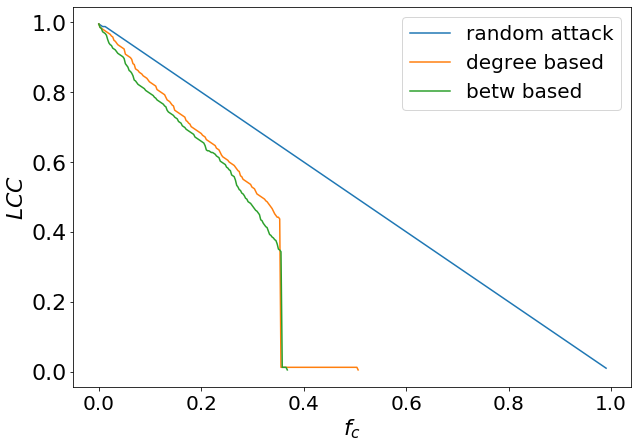

In [62]:
x=[k[0] for k in resilience_random]
y=[k[1] for k in resilience_random]

x1=[k[0] for k in resilience_deg]
y1=[k[1] for k in resilience_deg]

x2=[k[0] for k in resilience_betw]
y2=[k[1] for k in resilience_betw]

plt.figure(figsize=(10,7))

plt.plot(x,y, label='random attack')
plt.plot(x1,y1, label='degree based')
plt.plot(x2,y2, label='betw based')

plt.xlabel('$f_{c}$', fontsize=22)
plt.ylabel('$LCC$', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)

plt.legend(loc='upper right', fontsize=20)

Real networks such as the air transport network are vulnerable to targeted attacks.

## Robustness of the Erdos-Renyi random network

In [63]:
ER=nx.fast_gnp_random_graph(2000,0.012)
ER_nodes=list(ER.nodes())

In [64]:
#we rank the nodes by degree
ER_nodes_deg=[i for i,d in sorted(dict(ER.degree()).items(), key=itemgetter(1))]

In [65]:
ER_betw=nx.betweenness_centrality(ER)

In [66]:
ER_nodes_betw=[i for i,b in sorted(dict(ER_betw).items(), key=itemgetter(1))]

In [67]:
resilience_random=net_attack(ER, ER_nodes)
resilience_deg=net_attack(ER, ER_nodes_deg)
resilience_betw=net_attack(ER, ER_nodes_betw)

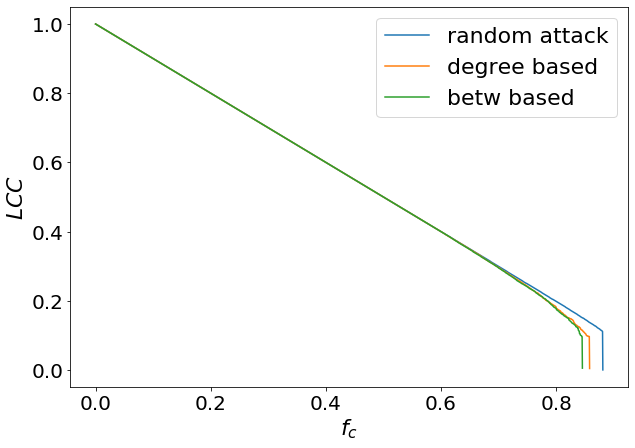

In [68]:
x=[k[0] for k in resilience_random]
y=[k[1] for k in resilience_random]

x1=[k[0] for k in resilience_deg]
y1=[k[1] for k in resilience_deg]

x2=[k[0] for k in resilience_betw]
y2=[k[1] for k in resilience_betw]

plt.figure(figsize=(10,7))

plt.plot(x,y, label='random attack')
plt.plot(x1,y1, label='degree based')
plt.plot(x2,y2, label='betw based')

plt.xlabel('$f_{c}$', fontsize=22)
plt.ylabel('$LCC$', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='upper right', fontsize=22)

Random networks such as the E-R network are not vulnerable to targeted attacks.

## Robustness of Barabasi-Albert network 